import libraries


In [177]:
import os
import numpy as np
import pandas as pd
import random, tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.ensemble import ExtraTreesClassifier
from PIL import Image

read data


In [178]:
DATA_DIR = '/home/kent/college/data_sets/deepglobe/'

In [179]:
metadata_df = pd.read_csv(os.path.join(DATA_DIR, 'metadata.csv'))

In [180]:
class_dict = pd.read_csv(os.path.join(DATA_DIR, 'class_dict.csv'))
# Get class names
class_names = class_dict['name'].tolist()
# Get class RGB values
class_rgb_values = class_dict[['r','g','b']].values.tolist()

In [181]:
class_dict

name    r    g    b
0        urban_land    0  255  255
1  agriculture_land  255  255    0
2         rangeland  255    0  255
3       forest_land    0  255    0
4             water    0    0  255
5       barren_land  255  255  255
6           unknown    0    0    0

In [182]:
metadata_df = (metadata_df
 .query('split == "train"')
 .filter(['image_id', 'sat_image_path', 'mask_path'])
)
metadata_df.head(3)

image_id        sat_image_path              mask_path
0    100694  train/100694_sat.jpg  train/100694_mask.png
1    102122  train/102122_sat.jpg  train/102122_mask.png
2     10233   train/10233_sat.jpg   train/10233_mask.png

In [183]:
metadata_df = (metadata_df
 .assign(sat_image_path_full =lambda x: DATA_DIR + x['sat_image_path'])
 .assign(mask_path_full =lambda x: DATA_DIR + x['mask_path'])
)
metadata_df.head(3)

image_id  ...                                     mask_path_full
0    100694  ...  /home/kent/college/data_sets/deepglobe/train/1...
1    102122  ...  /home/kent/college/data_sets/deepglobe/train/1...
2     10233  ...  /home/kent/college/data_sets/deepglobe/train/1...

[3 rows x 5 columns]

In [184]:
# helper function for data visualization
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

In [185]:
image = metadata_df.loc[45].at["sat_image_path_full"]
mask = metadata_df.loc[45].at["mask_path_full"]
image, mask

('/home/kent/college/data_sets/deepglobe/train/147545_sat.jpg',
 '/home/kent/college/data_sets/deepglobe/train/147545_mask.png')

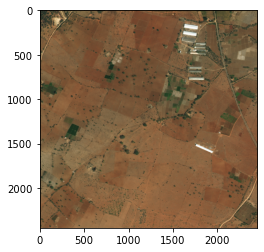

In [186]:
imgplot = plt.imshow(mpimg.imread(image))
plt.show()

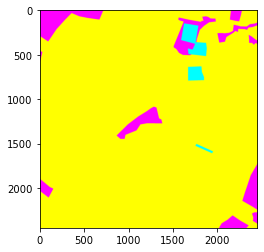

In [187]:
imgplot = plt.imshow(mpimg.imread(mask))
plt.show()

In [188]:
image

'/home/kent/college/data_sets/deepglobe/train/147545_sat.jpg'

In [189]:
X = mpimg.imread(image)

In [190]:
type(X)

numpy.ndarray

In [191]:
#y = mpimg.imread(mask)
y = np.asarray(Image.open(mask))

In [192]:
type(y)

numpy.ndarray

In [193]:
from PIL import Image
ipil = Image.open(image)

In [194]:
ipil.thumbnail((20, 20), Image.ANTIALIAS)  # resizes image in-place
# plt.imshow(ipil)

In [195]:
pix = ipil.load()

In [196]:
X[0,0,0],X[0,0,1],X[0,0,2]

(28, 40, 30)

In [197]:
pix[0,0]

(63, 62, 46)

In [245]:
smallX = X[400:500,1800:1900,:]
# XX = smallX.tolist()
# len(XX)
smally = y[400:500,1800:1900,:]
# yy = smally.tolist()
# len(yy)
smallX_test = X[300:400,1700:1800,:]

smally_test = y[300:400,1700:1800,:]


In [246]:
XX = np.concatenate(smallX)
XX_test = np.concatenate(smallX_test)
yy = np.concatenate(smally)
yy_test = np.concatenate(smally_test)

In [199]:
from sklearn.datasets import make_blobs

blobX, bloby = make_blobs(centers=2, random_state=0, cluster_std=1.5)

print('blobX ~ n_samples x n_features:', blobX.shape)
print('bloby ~ n_samples:', bloby.shape)

blobX ~ n_samples x n_features: (100, 2)
bloby ~ n_samples: (100,)


In [288]:
def plot_both(image,mask):
#     plt.figure(figsize=(20,8))

    plt.subplot(1, 2, 1)
    plt.xticks([]); 
    plt.yticks([])
    # get title from the parameter names
    plt.imshow(image)
    
    plt.subplot(1, 2, 2)
    plt.xticks([]); 
    plt.yticks([])
    # get title from the parameter names
    plt.imshow(mask)
    
    plt.show()

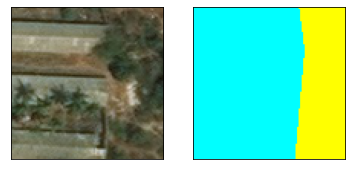

In [289]:
plot_both(smallX,smally)

In [250]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(XX,yy)

In [251]:
y_pred = clf.predict(XX_test)

In [252]:
print("Accuracy:",metrics.accuracy_score(yy_test, y_pred))

Accuracy: 0.4925


In [272]:
yy_test_back = yy_test.ravel().reshape((100,100,3))
y_pred_back = y_pred.ravel().reshape((100,100,3))

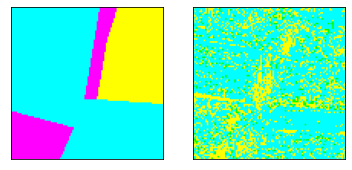

In [290]:
plot_both(yy_test_back,y_pred_back)

In [262]:
data = [[11, 22],
    [33, 44],
    [55, 66]]
data = np.array(data)
data

array([[11, 22],
       [33, 44],
       [55, 66]])

In [277]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(XX)

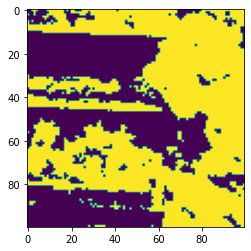

In [286]:
labs = kmeans.labels_
labs = labs.reshape((100,100,1))
plt.imshow(labs)

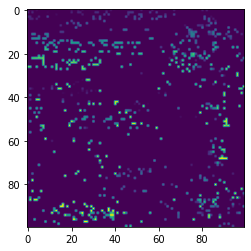

In [294]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(XX)
labs = db.labels_
labs = labs.reshape((100,100,1))
plt.imshow(labs)

In [295]:
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 128
Estimated number of noise points: 9286


In [225]:
from skimage import data
from skimage.exposure import histogram
from skimage import color
graysmallX = color.rgb2gray(smallX)
graysmally = color.rgb2gray(smally)
hist, hist_centers = histogram(graysmallX)

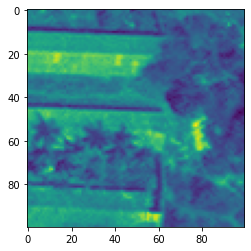

In [210]:
plt.imshow(graysmallX)

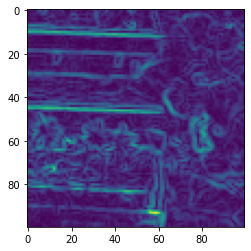

In [211]:
from skimage.filters import sobel

# Apply edge detection filter
edge_sobel = sobel(graysmallX)
plt.imshow(edge_sobel)

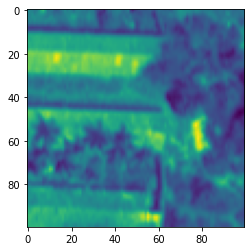

In [212]:
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(graysmallX, multichannel=True)
plt.imshow(gaussian_image)

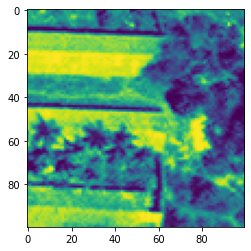

In [213]:
from skimage import exposure

# Histogram equalisation
image_eq = exposure.equalize_hist(graysmallX)
plt.imshow(image_eq)

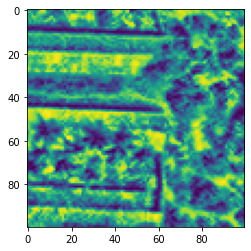

In [214]:
# CLAHE
# Higher clip limit = higher contrast
image_adapteq = exposure.equalize_adapthist(graysmallX, clip_limit=0.03)
plt.imshow(image_adapteq)

/tmp/ipykernel_602140/1304811216.py:5: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(graysmallX, n_segments=300)
/tmp/ipykernel_602140/1304811216.py:9: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, graysmallX, kind='avg')


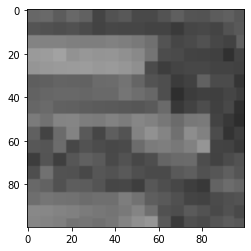

In [230]:
from skimage import segmentation
from skimage.color import label2rgb

# Obtain the segments
segments = segmentation.slic(graysmallX, n_segments=300)

# Put segments on top of original image
# Avg = average colour of superpixel
segmented_image = label2rgb(segments, graysmallX, kind='avg')
plt.imshow(segmented_image)

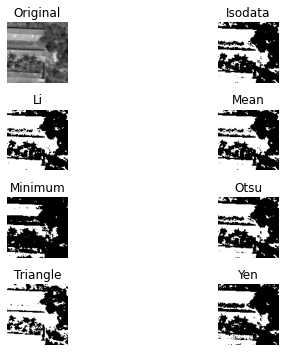

In [231]:
from skimage.filters import try_all_threshold

# Obtain all the resulting images
fig, ax = try_all_threshold(graysmallX, verbose=False)
plt.show()

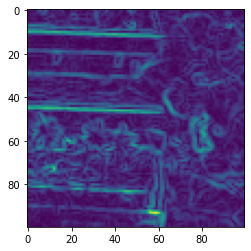

In [239]:
from skimage.filters import sobel
elevation_map = sobel(graysmallX)
plt.imshow(elevation_map)

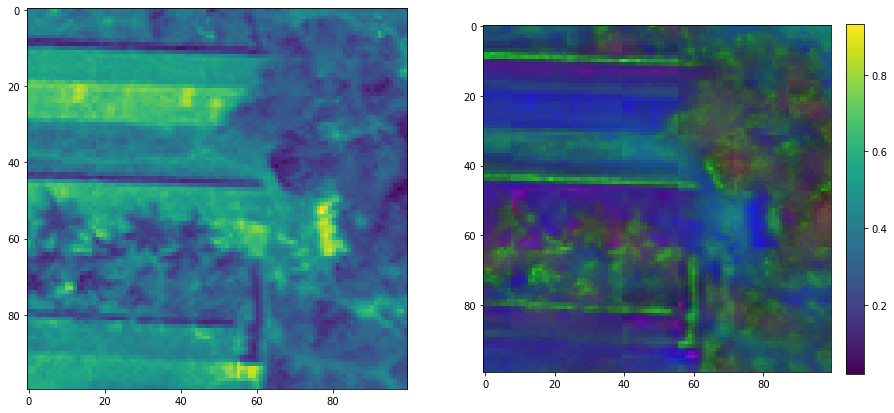

In [241]:
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
 
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 
# Sample Image of scikit-image package
plt.subplot(1, 2, 1)
 
# Displaying the sample image
plt.imshow(graysmallX)
 
# Converting RGB Image to HSV Image
hsv_smallX = rgb2hsv(smallX)
plt.subplot(1, 2, 2)
 
# Displaying the sample image - HSV Format
hsv_smallX_colorbar = plt.imshow(hsv_smallX)
 
# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_smallX_colorbar, fraction=0.046, pad=0.04)